In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data Collection: Obtain a dataset containing customer information, purchase history, and relevant data


In [19]:
df = pd.read_csv('ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [20]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [21]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [22]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [23]:
df.dropna()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [24]:
df.drop_duplicates()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


#Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle any missing or inconsistent data.

In [25]:
print("Dataset shape:", df.shape)

Dataset shape: (2205, 39)


In [26]:
df.fillna(df.mean(), inplace=True)

In [27]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 184


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3         

#Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of
purchases, etc.

In [29]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [36]:
average_purchase_value = df['MntTotal'].mean()
print("Average Purchase Value:", average_purchase_value)


Average Purchase Value: 563.789213260762


In [37]:
purchase_frequency = df.groupby('Income')['MntTotal'].count()

In [38]:
average_purchase_frequency = purchase_frequency.mean()
print("Average Purchase Frequency:", average_purchase_frequency)

Average Purchase Frequency: 1.0295466123280692


In [39]:
purchase_frequency

Income
1730.0      1
2447.0      1
3502.0      1
4023.0      1
4428.0      1
           ..
101970.0    1
102160.0    1
102692.0    1
105471.0    1
113734.0    1
Name: MntTotal, Length: 1963, dtype: int64

In [42]:
total_revenue = df['MntTotal'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 1139418


In [43]:
median_purchase_value = df['MntTotal'].median()
print("Median Purchase Value:", median_purchase_value)

Median Purchase Value: 343.0


In [44]:
max_purchase_value = df['MntTotal'].max()
print("Maximum Purchase Value:", max_purchase_value)

Maximum Purchase Value: 2491


In [45]:
min_purchase_value = df['MntTotal'].min()
print("Minimum Purchase Value:", min_purchase_value)

Minimum Purchase Value: 4


In [46]:
print(df[['MntTotal', 'AcceptedCmpOverall']].describe())

          MntTotal  AcceptedCmpOverall
count  2021.000000         2021.000000
mean    563.789213            0.302326
std     576.775749            0.680812
min       4.000000            0.000000
25%      55.000000            0.000000
50%     343.000000            0.000000
75%     964.000000            0.000000
max    2491.000000            4.000000


#Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segmentcustomers based on behavior and purchase patterns.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

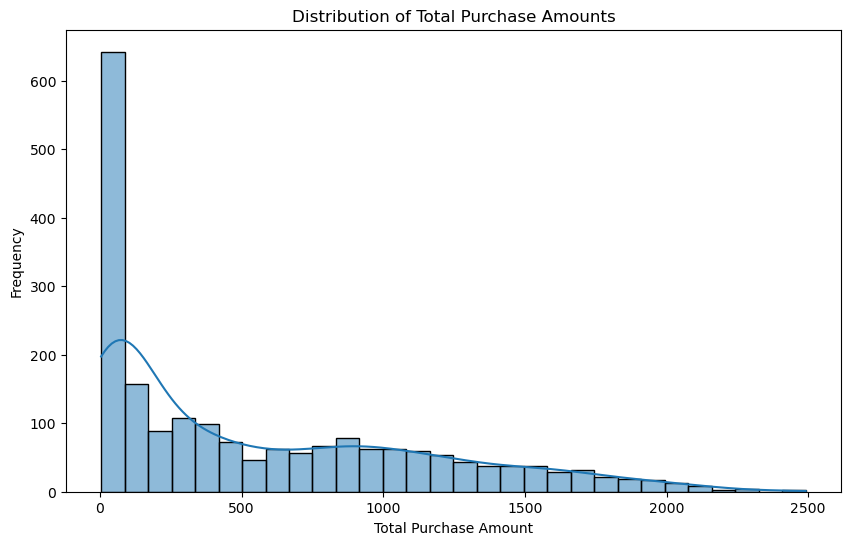

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MntTotal'], bins=30, kde=True)
plt.title('Distribution of Total Purchase Amounts')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

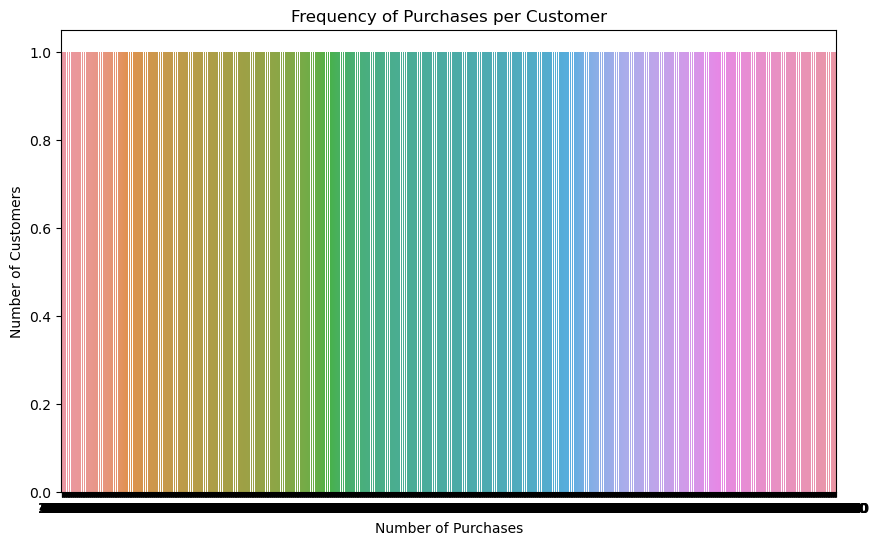

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=purchase_frequency.reset_index(), x='Income')
plt.title('Frequency of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
features = df[['Age', 'Income', 'MntTotal']]

In [56]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42)  
df['Segment'] = kmeans.fit_predict(features_scaled)

In [58]:
print(df[['Income', 'Segment']].head())

    Income  Segment
0  58138.0        0
1  46344.0        3
2  71613.0        0
3  26646.0        1
4  58293.0        1


#Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.

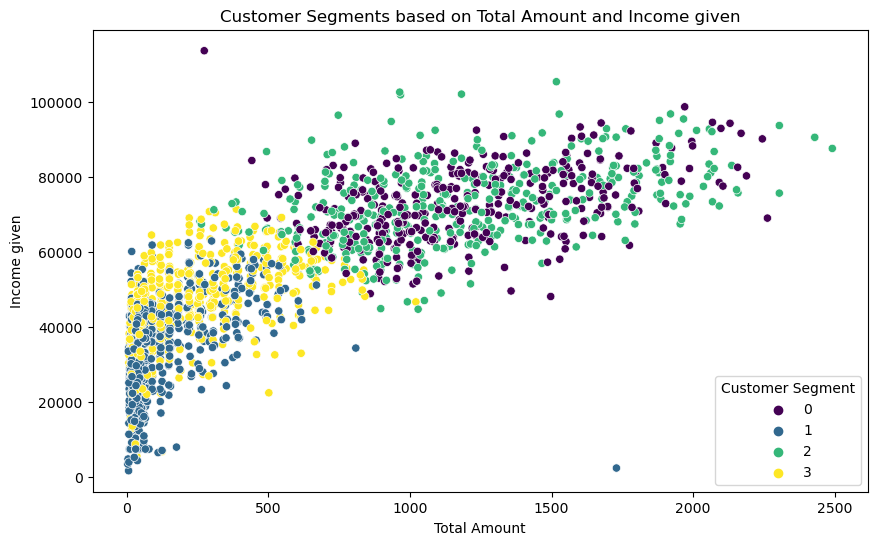

In [61]:
# Visualize the customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MntTotal', y='Income', hue='Segment', palette='viridis')
plt.title('Customer Segments based on Total Amount and Income given')
plt.xlabel('Total Amount')
plt.ylabel('Income given')
plt.legend(title='Customer Segment')
plt.show()

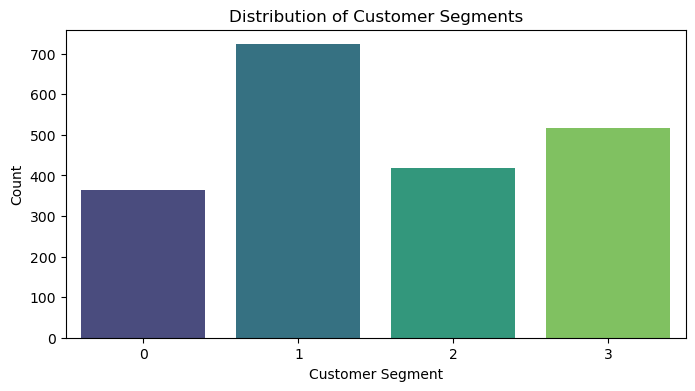

In [62]:
# Visualize the distribution of segments
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Segment', palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

#Insights and Recommendations: Analyze characteristics of each segment and provide insights.

In [73]:
# Group by segment and calculate average values
segment_analysis = df.groupby('Segment').agg({
    'Age' : 'mean',
    'Income': 'mean',
    'MntTotal': 'mean'
}).reset_index()


In [74]:
segment_analysis

,Segment,Age,Income,MntTotal
0,0,63.807163,72560.589532,1186.107438
1,1,42.438451,33128.280775,117.181189
2,2,43.050239,72490.327751,1184.260766
3,3,60.866538,46165.864603,249.744681


In [75]:
for index, row in segment_analysis.iterrows():
    print(f"Segment {row['Segment']}: Average Age: {row['Age']}, "
          f"Average Income: {row['Income']}, Average MntTotal: {row['MntTotal']}")

Segment 0.0: Average Age: 63.807162534435264, Average Income: 72560.58953168044, Average MntTotal: 1186.107438016529
Segment 1.0: Average Age: 42.438450899031814, Average Income: 33128.28077455048, Average MntTotal: 117.18118948824343
Segment 2.0: Average Age: 43.05023923444976, Average Income: 72490.32775119618, Average MntTotal: 1184.2607655502393
Segment 3.0: Average Age: 60.866537717601545, Average Income: 46165.86460348163, Average MntTotal: 249.74468085106383


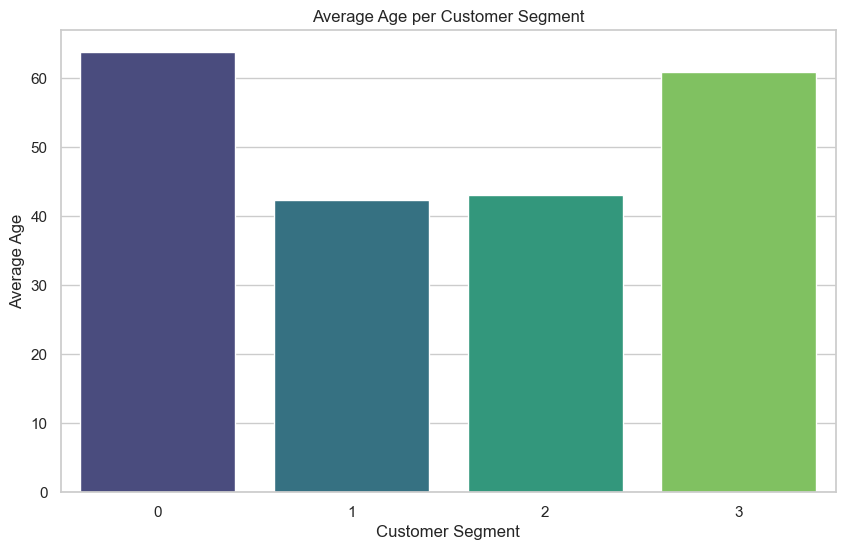

In [84]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='Segment', y='Age', palette='viridis')
plt.title('Average Age per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Age')
plt.show()

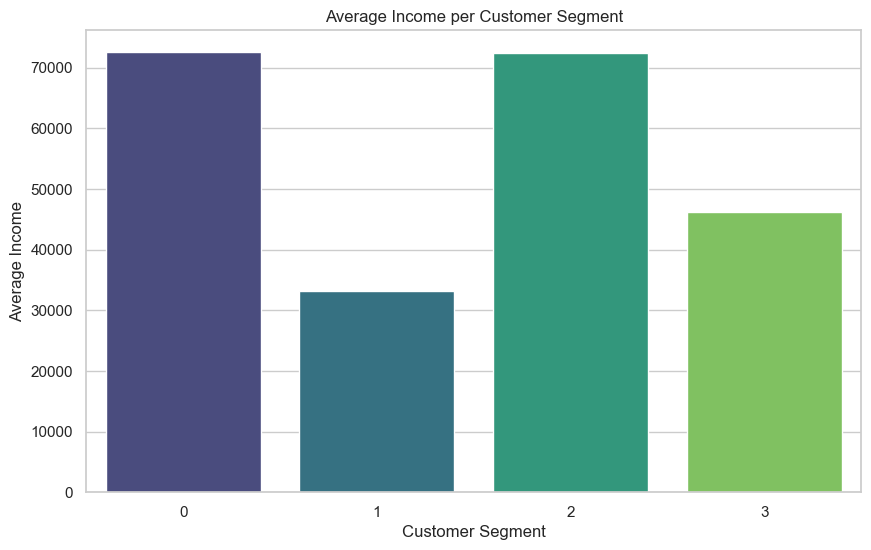

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='Segment', y='Income', palette='viridis')
plt.title('Average Income per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Income')
plt.show()

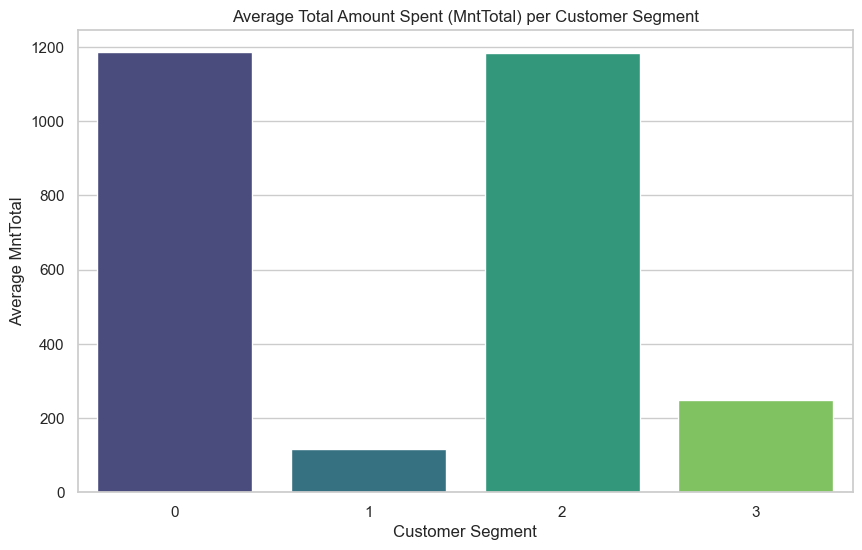

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='Segment', y='MntTotal', palette='viridis')
plt.title('Average Total Amount Spent (MntTotal) per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average MntTotal')
plt.show()

In [89]:
insights_summary = []
for index, row in segment_analysis.iterrows():
    insights_summary.append({
        'Segment': row['Segment'],
        'Average Age': row['Age'],
        'Average Income': row['Income'],
        'Average MntTotal': row['MntTotal'],
        'Recommendation': (
            "Target with premium product offerings and loyalty programs."
            if row['MntTotal'] > 100 else
            "Focus on increasing engagement through promotions and personalized marketing."
        )
    })
insights_df = pd.DataFrame(insights_summary)

In [90]:
insights_df

,Segment,Average Age,Average Income,Average MntTotal,Recommendation
0,0.0,63.807163,72560.589532,1186.107438,Target with premium product offerings and loya...
1,1.0,42.438451,33128.280775,117.181189,Target with premium product offerings and loya...
2,2.0,43.050239,72490.327751,1184.260766,Target with premium product offerings and loya...
3,3.0,60.866538,46165.864603,249.744681,Target with premium product offerings and loya...


# Thank you